## IMPORT LIBRARIES

In [1]:
import numpy as np # mathematical functions, linear algebra
import pandas as pd # data manipulation and analysis
import datatable as dt # manipulation of tabular data
import matplotlib.pyplot as plt
import seaborn as sns # based on matplotlib - data visualization
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
%%time

train_filename = "./TPS/TPStrain.csv"
test_filename = "./TPS/TPStest.csv"

train_orig = dt.fread(train_filename).to_pandas()
test_orig = dt.fread(test_filename).to_pandas()

train_orig = train_orig.set_index('id')
test_orig = test_orig.set_index('id')

Wall time: 7.09 s


In [3]:
train_orig.shape

(957919, 119)

118 features - ranging from 'f1' to 'f118' and 1 target column
957919 training examples - rows

In [4]:
train_orig.info()
test_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957919 entries, 0 to 957918
Columns: 119 entries, f1 to claim
dtypes: bool(1), float64(118)
memory usage: 870.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 493474 entries, 957919 to 1451392
Columns: 118 entries, f1 to f118
dtypes: float64(118)
memory usage: 448.0 MB


In [5]:
pd.set_option('display.max_columns', 120)
train_orig.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
count,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,942696.000000,942494.000000,9.423260e+05,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,9.425610e+05,9.424750e+05,9.426540e+05,942504.000000,942527.000000,942241.000000,9.423900e+05,9.424270e+05,942671.000000,9.425850e+05,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,9.424010e+05,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,9.423820e+05,9.423490e+05,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000,942573.000000,9.424340e+05,942292.000000,9.425340e+05,942470.000000,9.423960e+05,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,9.426310e+05,942485.000000,942393.000000,942570.000000,9.427510e+05,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,9.425790e+05,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000
mean,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,5323.442367,0.729518,1.844436e+09,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3.379988e+12,1.254164e+12,2.256887e+06,0.329054,7.882455,0.394211,1.344700e+05,3.579055e+05,-0.000005,2.782318e+16,185.485192,406.072571,1.768743,1981.074344,0.359381,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2.469247e+09,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,7.964640e+14,1.063963e+12,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237,3.240370,1.053811e+11,152.850973,6.128694e+06,635.301741,3.251414e+10,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,1.415684e+13,1.683151,0.425840,20.213776,3.215760e+05,548.647493,3855.616303,0.178027,0.160832,0.014196,1.671873e+09,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267
std,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,10068.380032,1.495535,2.125478e+09,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052,89859.616863,0.896001,37.350264,1.643595,314.822410,5.655524e+12,1.642736e+12,2.303909e+06,0.433861,5.939864,0.781932,2.036605e+05,4.626670e+05,0.001534,3.452707e+16,701.769083,314.708639,0.588984,1958.688237,0.441752,620.581881,0.407419,1.831970,28.776654,0.014658,1.139983,0.676841,2.107511,0.729078,0.146104,88.181507,2525.289159,21.651584,16.041827,0.110021,0.323768,0.001520,0.281456,1.734140,0.268437,0.256322,2.903456e+09

The dataset is far from standard - some features taking exponentially large values while some other taking exponentially small values

## 1. EXPLORATORY DATA ANALYSIS 

#### 1.0 Duplicate Removal

It's a possibility that our dataset has duplicate entries. This is typically a fault of the data acquisition step

In [6]:
# printing the number of duplicate entries(rows)
n_duplicates = train_orig.duplicated().sum()
print("Number of duplicated entries: {}".format(n_duplicates))

Number of duplicated entries: 0


No duplicates. Our dataset has only unique entries

#### 1.1 Target Column

DIstribution of the claim in the dataset:

In [7]:
list(train_orig.columns)

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'f61',
 'f62',
 'f63',
 'f64',
 'f65',
 'f66',
 'f67',
 'f68',
 'f69',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f76',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f84',
 'f85',
 'f86',
 'f87',
 'f88',
 'f89',
 'f90',
 'f91',
 'f92',
 'f93',
 'f94',
 'f95',
 'f96',
 'f97',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f107',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f116',
 'f117',
 'f118',
 'claim']

In [8]:
claim_dist = train_orig.claim.value_counts()
display(claim_dist)

False    480404
True     477515
Name: claim, dtype: int64

The claim column seems well balanced. Let us visualise it to confirm



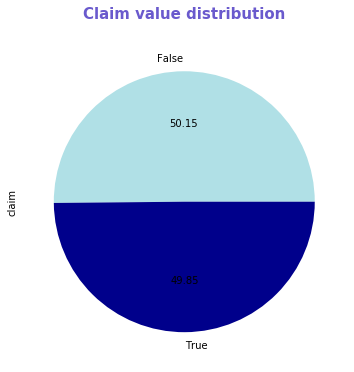

In [9]:
plt.figure(figsize = (10,6))
claim_dist.plot.pie(autopct = '%.2f', colors = ['powderblue', 'darkblue'])
plt.title("Claim value distribution", pad = 20, fontdict = {'size': 15, 'color': 'slateblue', 'weight': 'bold'})
plt.show()

#### 1.2 Feature Engineering

All features are of the same type, and we have no knowledge of what the features are, neither their impact on the target feature.




#### 1.3 Distribution Analysis

Since we have a very large dataset we will plot the distributions taking a small sample from the dataset. For better estimations we will take a random sample.


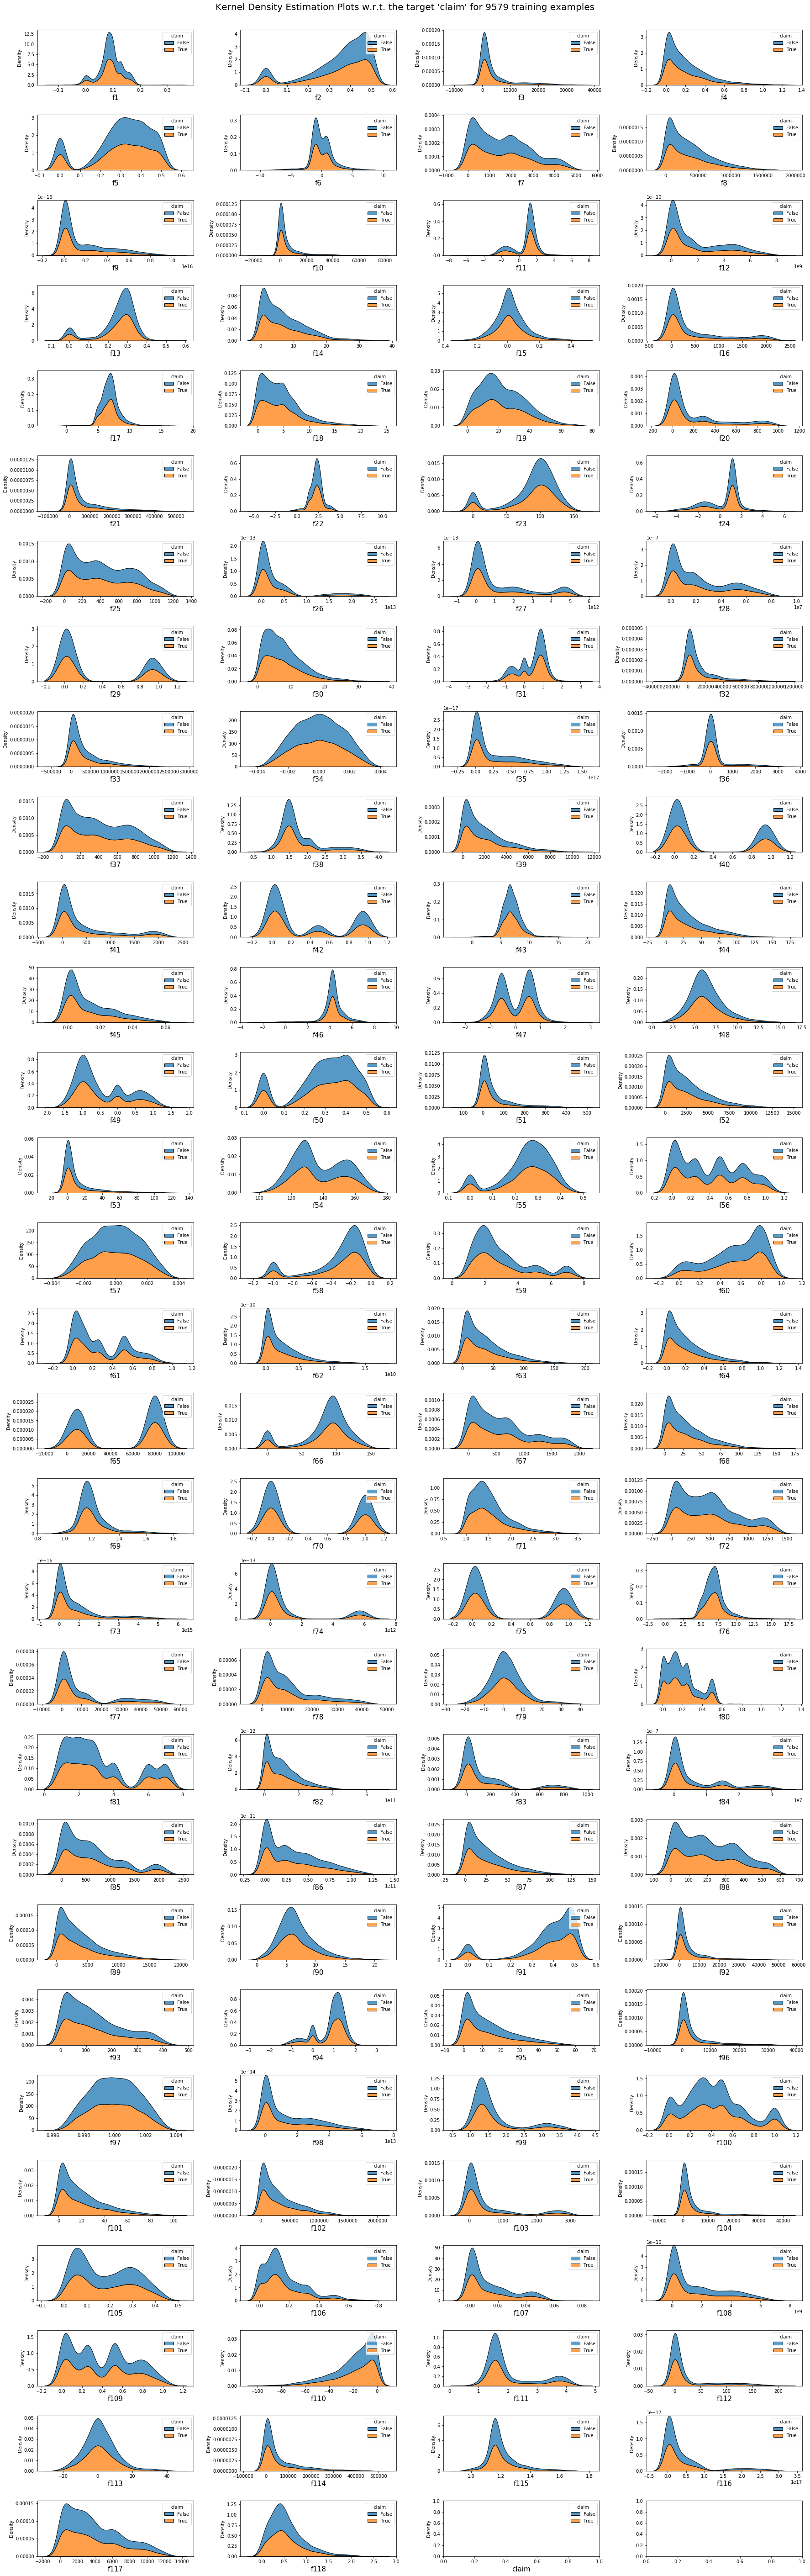

In [10]:
# true - false distribution in every column

train_frac = train_orig.sample(frac = 0.01).reset_index(drop = True)

target = train_frac.claim

c = 4  # cols
r = int(np.ceil(train_frac.shape[1]/4)) # rows

# stacking the subplots with the dimensions above + size of each
fig, ax = plt.subplots(nrows = r, ncols = c, figsize = (25,80))
i = 1

# density plots - kernel density estimate
for col in train_frac.columns:
    plt.subplot(r, c, i)
    ax = sns.kdeplot(train_frac[col], hue = target, fill=True, multiple="stack")
    plt.xlabel(col, fontsize= 15)
    i = i + 1
    
fig.tight_layout(pad = 2.0)
fig.subplots_adjust(top = 0.97)
plt.suptitle("Kernel Density Estimation Plots w.r.t. the target 'claim' for {} training examples".format(train_frac.shape[0]), fontsize = 20)
plt.show()


There doesn't seem to be a pattern in any of the distributions w.r.t the target variable



#### 1.4 Correlation Analysis

We'll make use of a correlation matrix to check which features are strongly related to one another

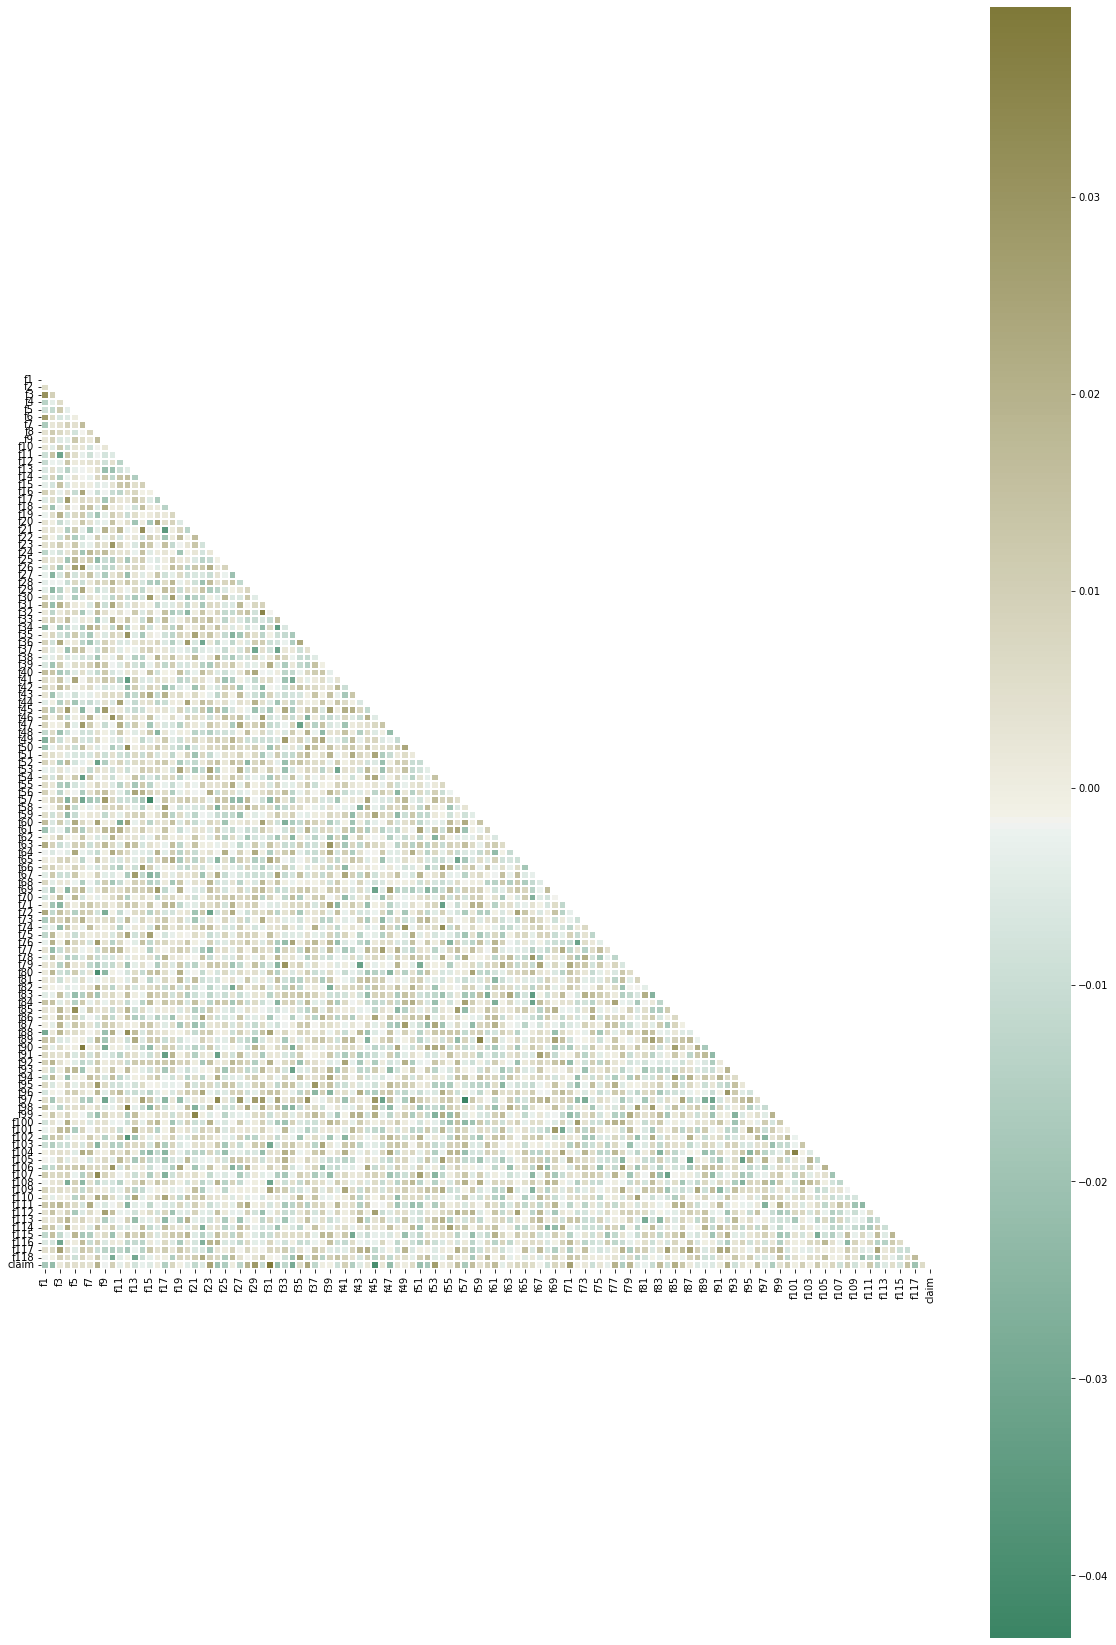

In [11]:
corrMat = train_frac.corr()

fig, ax = plt.subplots(figsize = (20,30))
cmap = sns.diverging_palette(150, 80, as_cmap = True)
mask = np.triu(np.ones_like(corrMat, dtype = bool))
sns.heatmap(corrMat, square = True, annot = False, linewidths = 1, cmap = cmap, mask = mask)

There are a few darker cells which show relatively strong correlation between the concerning features/variables.
However, even these relatively strong corelations have very small correlation coefficients from a general POV (upper bound at 0.04 and lower bound at -0.05 or so)

Strong correlations have values greater than 0.5 or less than -0.5

We can therefore safely conclude that none of the features have a strong correlation among one another




## 2. DATA CLEANING

#### 2.0 Dataset Split

It is reccomended to split the dataset into a training set and a validation set to ensure that the model we are building won't be adversely affected by data leakage.

Since our dataset is large, we will use train_test_split to split the dataset, instead of using K fold CV

In [12]:
from sklearn.model_selection import train_test_split

X = train_orig.copy()
Y = X.claim
X.drop('claim', axis = 1, inplace = True)

X_train_orig, X_valid_orig, Y_train_orig, Y_valid_orig = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_test_orig = test_orig.copy()
print("Y_train_orig:", Y_train_orig)

Y_train_orig: id
276215     True
222560    False
131978    False
767854     True
93991      True
          ...  
259178     True
365838    False
131932     True
671155     True
121958     True
Name: claim, Length: 766335, dtype: bool




#### 2.1 Missing Values

Imputation would be suitable since our dataset only has numerical values.
For numerical data two most suitable imputation techniques that could be used here are mean and median imputation.

The technique which has the better performance on the validation set is chosen



In [13]:
missing_val_cols = X_train_orig.isnull().sum().sort_values(ascending = False)
missing_val_cols = missing_val_cols[missing_val_cols > 0]
ratio_of_missing = missing_val_cols / X_train_orig.shape[0]
missing = pd.concat([missing_val_cols, ratio_of_missing], axis = 1, keys = ['Count', '%'])
missing

,Count,%
f46,12537,0.016360
f12,12520,0.016338
f31,12516,0.016332
f109,12504,0.016317
f115,12502,0.016314
...,...,...
f118,12127,0.015825
f104,12116,0.015810
f28,12111,0.015804
f72,12064,0.015742




Surprisingly, every feature has missing entries. However, the number of missing entries compared to the entire dataset is quite small.



In [14]:
# imputation

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = False)
my_imputer.fit(X_train_orig)

X_train_imputed = my_imputer.transform(X_train_orig)
X_valid_imputed = my_imputer.transform(X_valid_orig)
X_test_imputed = my_imputer.transform(X_test_orig)





## 3. FEATURE SCALING


Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard deviation, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance) - z-scores

They can become skewed or biased if the input contains outliers
To overcome this, the median and IQR can be used when standardizing numerical input variables, generally reffered to as robust scaling.



In [15]:
from sklearn.preprocessing import RobustScaler, StandardScaler

#robust
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_imputed)
X_train_robust = robust_scaler.transform(X_train_imputed)
X_valid_robust = robust_scaler.transform(X_valid_imputed)
X_test_robust = robust_scaler.transform(X_test_imputed)

#standard
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_robust)
X_train_scaled = standard_scaler.transform(X_train_robust)
X_valid_scaled = standard_scaler.transform(X_valid_robust)
X_test_scaled = standard_scaler.transform(X_test_robust)



On passing through the scalers, our data frame has now been converted into a numpy array, so we convert it back to a data frame


In [16]:
X_train_final = pd.DataFrame(X_train_scaled, index = X_train_orig.index, columns = X_train_orig.columns)
X_valid_final = pd.DataFrame(X_valid_scaled, index = X_valid_orig.index, 
                            columns = X_valid_orig.columns)
X_test_final = pd.DataFrame(X_test_scaled, index = X_test_orig.index, 
                           columns = X_test_orig.columns)

In [17]:
# final training set
X_train_final.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
276215,0.932576,-1.310251,0.119557,-0.763990,-2.134686,-0.325305,-1.260324,-0.583203,0.201174,-0.508445,0.495448,-0.874237,0.836890,-1.085302,-0.097311,-6.424177e-01,0.263462,2.701269,-1.387172,-0.714124,0.491270,-0.188702,-0.237467,-0.935795,-0.320655,-0.596496,-0.766507,0.407188,-0.554632,1.258531,-0.500683,-0.646489,-0.446030,-0.145332,0.030796,-0.416718,0.894630,-0.425402,-0.669502,-0.777927,0.625288,-8.463318e-01,2.770217,-1.007193,-1.911376e-16,1.032786,-0.901404,0.042235,-0.628043,1.176106,-0.517501,2.303386e+00,1.091935,-1.765944,-0.237294,1.597847,0.533585,0.611745,-0.532347,-0.848601,1.405505,-0.194680,-0.955776,-0.295048,-1.263635,0.597536,-0.339067,-0.758796,-0.056953,-0.844873,2.278749,0.097078,-0.496376,-0.534574,-0.853369,-0.267664,-0.061827,0.589275,-2.163245,1.525640,-0.629046,0.065416,3.109775e-01,-0.325739,-0.155701,1.045026,-0.222923,-0.394731,2.598744,0.359977,-2.474240,0.776981,-1.211618,0.491482,1.270803,-0.449376,-0.269318,-0.865438,-0.399243,0.269998,0.454111,-0.650719,-0.639464,0.108601,1.091801e+00,1.365127,-0.179324,-0.581233,-0.439163,-2.263232,-0.384039,-0.344679,0.079505,-0.442314,-0.106609,-0.039309,-0.164897,-1.087788
222560,-0.236793,-1.082423,-0.618986,1.294805,0.293245,0.004040,0.765858,-0.364509,-0.665239,-0.552244,0.418334,1.507452,0.790742,-1.039805,0.784093,-7.130147e-01,1.028853,0.101037,-1.571051,2.863894,-0.580136,0.573117,0.551639,0.483601,-1.221260,-0.598993,2.147693,0.035590,1.379302,0.133883,-1.518343,-0.637474,1.130391,1.708512,-0.803434,-0.481349,-0.754716,-0.451433,-0.285888,1.522372,-0.743643,1.603451e+00,-0.139787,0.108409,-1.026907e+00,-0.208041,1.319377,-1.677579,-0.682189,0.141801,2.103361,-9.273363e-01,-0.437530,1.688272,0.656965,1.437522,-0.363055,0.881893,-0.950279,0.890879,1.056050,-0.664817,-0.575096,1.541203,0.774110,0.755090,1.573148,-1.024969,-0.286055,-0.847509,0.921684,-0.251622,-0.670453,-0.343516,-0.653927,-0.155058,-0.620245,-1.031757,1.861334,-0.334146,-1.128451,0.918268,-5.519841e-01,0.552437,-0.108407,-0.821321,-0.487224,-1.069955,0.349717,0.003083,-0.485610,0.793977,-0.082121,0.543534,-0.600016,0.069838,0.019686,-0.873876,-0.757378,-0.266901,0.228531,0.031029,-0.325370,-0.280115,-1.496110e+00,-0.061727,-0.625119,-0.894392,-0.452596,0.791477,-0.440462,-0.553925,-0.176247,-0.120600,-0.660086,-0.640566,0.024270,1.518880
131978,0.934657,0.024883,-0.546111,-0.615781,0.752554,-0.349761,0.596916,-0.051339,1.875317,-0.443048,0.455678,-0.872518,-2.535757,-0.379425,-0.024786,-3.696660e-01,0.032834,-0.138576,-0.115503,-0.724776,-0.465095,1.430485,0.819082,0.590614,-0.648837,-0.382369,-0.642994,1.991236,1.534159,-0.854600,0.550633,-0.650825,-0.840800,-1.059534,0.783011,0.514467,0.160865,0.316844,-0.830038,-0.814636,-0.538504,1.604935e+00,-1.069474,-0.762170,-6.374077e-01,0.751025,-1.374998,0.245109,-1.023515,-2.045613,0.301013,3.348658e-01,1.022305,-0.635073,-0.388354,1.612479,-0.699361,0.601243,2.425373,0.558032,1.644912,-0.305879,-0.800251,1.118866,-0.978135,-0.023360,-0.992260,-0.985652,0.070846,-0.855900,-0.172451,-1.048411,2.278468,-0.436303,1.180968,-1.135931,-0.555630,-0.606163,0.598216,1.852406,1.926122,-0.867886,-6.061086e-01,-0.635532,-0.447433,1.133546,-0.826095,-1.105496,0.529967,-0.051537,0.708521,-0.319373,-0.782351,1.010726,0.592943,-0.571623,-0.702823,1.287132,-0.477129,-1.505159,-0.187467,-0.868517,-0.619307,-0.564102,-4.246965e-01,-0.571304,0.280945,-0.78172

In [18]:
X_train_final.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
count,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05,7.663350e+05
mean,-4.296648e-18,1.867225e-16,3.409392e-17,-4.957311e-17,-4.196373e-17,7.006414e-18,-2.816503e-17,4.232577e-17,2.866195e-17,-3.115335e-17,-6.898077e-17,-4.590489e-18,7.254468e-17,-7.262349e-17,-4.440385e-17,-1.287903e-16,1.017047e-17,1.015048e-17,1.375075e-17,2.750875e-18,-1.490062e-17,-5.307002e-17,1.386900e-16,1.610112e-16,-1.454973e-17,-1.256597e-17,-3.538093e-17,-8.655664e-17,1.343287e-16,2.803993e-17,3.264599e-17,2.203829e-17,1.109523e-16,-1.383123e-17,1.118418e-16,-1.103352e-16,-5.679527e-17,2.025952e-17,9.211982e-17,1.040409e-16,-2.071692e-16,-3.229990e-16,-1.097134e-17,3.116295e-17,-8.832737e-17,3.572631e-17,3.093676e-17,2.299359e-17,1.218630e-16,5.696750e-17,9.406693e-19,-8.547124e-17,-8.086844e-17,-1.265075e-16,7.526948e-18,-2.245234e-17,-2.249109e-17,6.702787e-17,-3.153557e-17,1.617377e-18,4.497190e-17,3.344374e-17,1.308109e-16,3.369445e-17,1.156999e-16,2.171899e-17,-6.216371e-17,1.387110e-16,-1.618429e-16,-1.426674e-16,-1.902345e-17,6.527952e-17,-5.885779e-17,-3.516202e-17,-1.343869e-16,-1.490670e-17,1.194402e-16,-1.315819e-16,3.486952e-17,7.640747e-17,3.472682e-17,4.884773e-17,-7.739471e-17,3.146026e-16,-7.107609e-17,-5.661922e-17,3.135378e-17,6.327374e-17,1.217245e-17,-4.887989e-17,-1.139454e-16,-4.982592e-17,-7.313345e-17,-5.123714e-17,-4.389013e-17,-7.021463e-17,3.263429e-16,-7.082198e-17,6.789574e-17,-8.190038e-17,-4.573481e-17,-2.031153e-17,5.750006e-17,4.653034e-17,-6.899063e-18,1.133381e-17,6.666496e-17,2.730882e-19,2.284452e-17,2.525704e-17,3.462237e-17,-2.332709e-17,-2.980051e-17,1.635693e-16,1.070575e-16,2.106357e-17,-3.506380e-17,-1.926000e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,



## 4. MODEL FITTING AND EVALUATION

#### 4.0 Logistic Regression

Looking at how a simple logistic regression model would perform on a random sample of the dataset as compared to the entire dataset



In [19]:
# get a fraction of the training set

train_final = pd.concat([X_train_final, Y_train_orig], axis = 1)
X_train_final_frac = train_final.sample(frac = 0.01).reset_index(drop = True)
Y_train_final_frac = X_train_final_frac.claim
X_train_final_frac.drop('claim', axis = 1, inplace = True)

#get a fraction of validation set
valid_final = pd.concat([X_valid_final,Y_valid_orig], axis = 1)
X_valid_final_frac = valid_final.sample(frac = 0.01).reset_index(drop = True)
Y_valid_final_frac = X_valid_final_frac.claim
X_valid_final_frac.drop('claim', axis = 1, inplace = True)

In [52]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import roc_auc_score

def get_score(actual, preds):
    score = roc_auc_score(actual, preds)
    return score

lr = LogisticRegression(solver = 'sag')

# LR for the entire training set
start_full = time.time()
lr.fit(X_train_final, Y_train_orig)

preds_full = lr.predict_proba(X_valid_final)[:,1]
score_full = get_score(Y_valid_orig, preds_full)
print('roc-auc for full fit: {}'.format(score_full))
end_full = time.time()


# lR for sample set
start_frac = time.time()
lr.fit(X_train_final_frac,Y_train_final_frac)
preds_frac = lr.predict_proba(X_valid_final)[:,1]
score_frac = get_score(Y_valid_orig,preds_frac)
print('roc-auc score for sample fit: {}'.format(score_frac))
end_frac = time.time()

print('full train time: {}\nsample train time: {}'.format(end_full-start_full, end_frac-start_frac))


The score on the sample fit is quite close to the score for the model fit on the entire training set.

This may not be entirely true for more complex models, and is not really recommended, but in the case that a dataset is balanced, as above, this technique is able to approximately generate good results plus cut off on the training time.





#### 4.1 Naive Bayes

The Naive Bayes Classifier has the additional advantage that it is very fast for large datasets such as ours



In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Naive Bayes for entire training set
nb_full_start = time.time()
nb.fit(X_train_final, Y_train_orig)
nb_full_preds = nb.predict_proba(X_valid_final)[:,1]
# nb_full_preds2 = nb.predict(X_valid_final)
nb_full_score = get_score(Y_valid_orig, nb_full_preds)
nb_full_end = time.time()
print('roc-auc for full fit: {}'.format(nb_full_score))

#Naive Bayes for 1/100th of training set
nb_frac_start = time.time()
nb.fit(X_train_final_frac,Y_train_final_frac)
nb_frac_preds = nb.predict_proba(X_valid_final)[:,1]
nb_frac_score = get_score(Y_valid_orig,nb_frac_preds)
nb_frac_end = time.time()
print('roc-auc for sample fit: {}'.format(nb_frac_score))

print('full train time: {}\nsample train time: {}'.format(nb_full_end-nb_full_start,nb_frac_end-nb_frac_start))

roc-auc for full fit: 0.543894920835352
roc-auc for sample fit: 0.5218794424557874
full train time: 2.0648458003997803
sample train time: 0.5130269527435303




#### 4.2.0 XGB Classifier

We now enhance our baseline models and try to get more accurate results with better, more comprehensive models



In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
# xgb_fit_start = time.time()
# xgb.fit(X_train_final, Y_train_orig)
# xgb_fit_end = time.time()

# # predictions on train and validation set
# xgb_train_preds = xgb.predict_proba(X_train_final)[:,1]
# xgb_valid_preds = xgb.predict_proba(X_valid_final)[:,1]

# # scores
# xgb_train_score = get_score(Y_train_orig, xgb_train_preds)
# xgb_valid_score = get_score(Y_valid_orig, xgb_valid_preds)

# xgb_fit_time = xgb_fit_end - xgb_fit_start
# xgb_of = xgb_train_score - xgb_valid_score



#### 4.2.1 Catboost Classifier


In [25]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate = 0.1)

cat_fit_start = time.time()
cat.fit(X_train_final, Y_train_orig, verbose = False)
cat_fit_end = time.time()

## predictions on train and validation set
cat_train_preds = cat.predict_proba(pd.DataFrame(X_train_final))[:,1]
cat_valid_preds = cat.predict_proba(pd.DataFrame(X_valid_final))[:,1]

#reshape distorted prediction array
cat_train_preds = cat_train_preds.reshape(len(cat_train_preds),)
cat_valid_preds = cat_valid_preds.reshape(len(cat_valid_preds),)

# scores
cat_train_score = get_score(Y_train_orig,cat_train_preds)
cat_valid_score = get_score(Y_valid_orig, cat_valid_preds)

cat_fit_time = cat_fit_end - cat_fit_start
cat_of = cat_train_score - cat_valid_score




#### 4.2.2 Light GBM Classifier


In [27]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

lgbm_fit_start = time.time()
lgbm.fit(X_train_final,Y_train_orig)
lgbm_fit_end = time.time()

# predictions on train and validation set
lgbm_valid_preds= lgbm.predict_proba(X_valid_final)[:,1]
lgbm_train_preds = lgbm.predict_proba(X_train_final)[:,1]

#get score
lgbm_valid_score = get_score(Y_valid_orig,lgbm_valid_preds)
lgbm_train_score = get_score(Y_train_orig,lgbm_train_preds)

lgbm_fit_time = lgbm_fit_end - lgbm_fit_start
lgbm_of = lgbm_train_score - lgbm_valid_score



#### 4.3 Performance Comparison


In [31]:
models = [(xgb, 'XGBoost'), (cat, 'CatBoost'), (lgbm, 'LightGBM')]

xgb_eval = {'Model' : 'XGBoost',
            'Train Time' : xgb_fit_time,
            'Train Score' : xgb_train_score, 
            'Val. Score' : xgb_valid_score,
            'Overfitting' : xgb_of}

cat_eval = {'Model' : 'CatBoost',
           'Train Time' : cat_fit_time,
           'Train Score' : cat_train_score,
           'Val. Score' : cat_valid_score,
           'Overfitting' : cat_of}

lgbm_eval = {'Model' : 'LightGBM',
            'Train Time' : lgbm_fit_time,
            'Train Score' : lgbm_train_score,
            'Val. Score' : lgbm_valid_score,
            'Overfitting' : lgbm_of}   

evaluations = pd.DataFrame({'Model': [],
                            'Train Time' : [],
                            'Train Score' : [],
                            'Val. Score' : [],
                            'Overfitting' : []})

evaluations = evaluations.append([xgb_eval,cat_eval,lgbm_eval], ignore_index = True)
evaluations.set_index('Model', inplace = True)

evaluations

,Train Time,Train Score,Val. Score,Overfitting
Model,,,,
XGBoost,587.285073,0.813096,0.776003,0.037093
CatBoost,321.241849,0.810171,0.795863,0.014308
LightGBM,24.823952,0.777735,0.765739,0.011996



In conclusion, none of the models show signs of overfitting.
Of the three, catboost gave the best results on the validation set

All in all, these are still pretty decent results/scores by standards of baseline models
In terms of model accuracy, catboost should be chosen as it shows the best score on the validation set. In terms of computation speed, lightgbm should be chosen, as it was 10x faster than the next fastest model, which was catboost

## 5.0 OPTIMIZATION

We now proceed to optimize the baseline models in order to get better performance

When we talk about optimizing our models we mean optimizing the hyperparameters of our models and getting the best set of hyperparameters of our model and getting the best set of hyperparamters that would maximize performance.

To do this we use a number of techniques depending on the dataset at hand:

1) Grid Search with CV - where we feed a grid of different hyperparameter values and the model is trained for **every possible** combinations of hyperparameter values

2) Randomized Search with CV - instead of specifying a set of hyperparameter values we sample values from a statistical distribution **for each** hyperparameter. It might not the the best combination selection, but it runs alot faster than grid search.

3) Bayesian Optimization Methods - we keep track of past evaluation results - then form a probabilistic model mapping hyperparameters to a probability score on the objective function

We go with Bayesian Optimization due to the large dataset we have - model fitting would be costly

In [33]:

# library to implement Bayesian Optimization
import optuna


#### 5.1 XGB Classifier

Hyperparameter analysis using Bayesian methods, with Optuna

In [55]:
# from optuna.integration import XGBoostPruningCallback
# from sklearn.model_selection import StratifiedKFold

# def get_score(actual, preds):
#     score = roc_auc_score(actual, preds)
#     return score

# def objective_function(trial):
#     n_estimators = trial.suggest_int('n_estimators', 5000, 30000)
#     use_label_encoder = trial.suggest_categorical('use_label_encoder',['False'])
#     max_depth = trial.suggest_int('max_depth', 2, 10)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 0.9)
#     objective = trial.suggest_categorical('objective',['binary:logistic'])
#     eval_metric = trial.suggest_categorical('eval_metric',['auc','logloss'])
#     booster = trial.suggest_categorical('booster',['gbtree'])
#     tree_method = trial.suggest_categorical('tree_method',['auto'])
#     predictor = trial.suggest_categorical('predictor',['cpu_predictor'])
#     subsample = trial.suggest_float('subsample', 0.3, 0.9)
#     gamma = trial.suggest_float('gamma', 0.005, 0.5, log = True)
#     reg_alpha = trial.suggest_float('reg_alpha', 0.1, 20, log = True)
#     reg_lambda = trial.suggest_float('reg_lambda', 0.1, 20, log = True)
#     min_child_weight = trial.suggest_int('min_child_weight', 1, 250)
    
    
#     params = {'n_estimators' : n_estimators, 
#                'use_label_encoder' : use_label_encoder,
#                'max_depth' : max_depth, 
#                'learning_rate' : learning_rate,
#                'colsample_bytree' : colsample_bytree, 
#                'objective' : objective, 
#                'eval_metric' : eval_metric,
#                'booster' : booster, 
#                'subsample' : subsample, 
#                'tree_method' : tree_method,
#                'predictor' : predictor,
#                'gamma' : gamma, 
#                'reg_alpha' : reg_alpha, 
#                'reg_lambda' : reg_lambda,
#                'min_child_weight' : min_child_weight, 
#                'random_state' : 42}
    
#     KFold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#     fold_scores = np.zeros(5)
    
#     for idx, (train_idx, valid_idx) in enumerate(KFold.split(X_train_final,Y_train_orig)):
#         print('---------------Fold {}----------------'.format(idx))
        
#         # extract the validated rows
#         Xt, Xv = X_train_final.iloc[train_idx], X_train_final.iloc[valid_idx]
#         Yt, Yv = Y_train_orig.iloc[train_idx], Y_train_orig.iloc[valid_idx]
    
#         xgb = XGBClassifier(**params)
    
#         xgb.fit(Xt, Yt, early_stopping_rounds = 50,
#                 eval_set = [(Xv,Yv)], verbose = False,
#         #callbacks = [XGBoostPruningCallback(trial,'validation-error')]
#                )
    
#         preds = xgb.predict_proba(Xv)[:,1]
        
#         fold_scores[idx] = get_score(Yv,preds)
    
#         return np.mean(fold_scores)
    
    
# study = optuna.create_study(direction = 'maximize')
# study.optimize(objective_function, show_progress_bar = True, n_trials = 100)

# # print best params

# trial = study.best_trial
# print('Best Value: {}'.format(trial.value))
# print('Best Parameters: ')
# for param, value in trial.params.items():
#      print('{} : {}'.format(param,value))

[I 2021-09-24 15:44:17,395] A new study created in memory with name: no-name-bf4122aa-8029-4ec9-8adf-a2af30a5238d


---------------Fold 0----------------
[I 2021-09-24 15:58:49,411] Trial 0 finished with value: 0.1540417287337296 and parameters: {'n_estimators': 12077, 'use_label_encoder': 'False', 'max_depth': 7, 'learning_rate': 0.17787963770728385, 'colsample_bytree': 0.753964031022194, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'booster': 'gbtree', 'tree_method': 'auto', 'predictor': 'cpu_predictor', 'subsample': 0.3030094282920292, 'gamma': 0.040661999155481604, 'reg_alpha': 0.13002951333422566, 'reg_lambda': 3.3602445889053083, 'min_child_weight': 139}. Best is trial 0 with value: 0.1540417287337296.
---------------Fold 0----------------



KeyboardInterrupt: 

In [57]:

# training final XGB Model

# optimized values from 
xgb_params = {'n_estimators' : 16678,
             'use_label_encoder' : 'False',
             'max_depth' : 3,
             'learning_rate' : 0.027297134107723935,
             'colsample_bytree' : 0.7843918860573006,
             'objective' : 'binary:logistic', 
             'subsample' : 0.7459596984766819,
             'gamma' : 0.05008218776821978,
             'reg_alpha' : 0.861755644724069,
             'reg_lambda' : 0.11499104081826494,
             'min_child_weight' : 227, 
             'eval_metric' : 'logloss',
             'booster' : 'gbtree',
             'tree_method' : 'auto',
             'predictor' : 'cpu_predictor',
             'random_state' : 42}

xgb = XGBClassifier(**xgb_params)

#fit model
xgb_fit_start = time.time()
xgb.fit(X_train_final,Y_train_orig, early_stopping_rounds = 100,
       eval_set = [(X_valid_final,Y_valid_orig)], verbose = False)
xgb_fit_end = time.time()


# make predictions
xgb_train_preds = xgb.predict_proba(X_train_final)[:,1]
xgb_valid_preds = xgb.predict_proba(X_valid_final)[:,1]

#get scores
xgb_train_score = get_score(Y_train_orig,xgb_train_preds)
xgb_valid_score = get_score(Y_valid_orig,xgb_valid_preds)

print('Training AUC score for XGBoost: {}'.format(xgb_train_score))
print('Validation AUC score for XGBoost: {}'.format(xgb_valid_score))

print('Training time: {}'.format(xgb_fit_end - xgb_fit_start))

KeyboardInterrupt: 


#### 5.2 CatBoost Classifier

Optimizing the objective function


In [ ]:
Y_train_cat = Y_train_orig.astype(float)
print(Y_train_cat)

# def objective_function(trial):
#     n_estimators = trial.suggest_int('n_estimators', 1000, 20000, step = 100)
#     learning_rate = trial.suggest_float('learning_rate', 0.001, 2, log = True)
#     max_depth = trial.suggest_int('max_depth', 4, 10)
#     reg_lambda = trial.suggest_float('reg_lambda', 0.1, 50, step = 0.1)
#     random_strength = trial.suggest_float('random_strength', 0.1, 50, log = True)
#     loss_function = trial.suggest_categorical('loss_function', ['Logloss','CrossEntropy'])
#     bootstrap_type = trial.suggest_categorical('bootstrap_type', ['Bayesian','Bernoulli'])
#     subsample = None
#     bagging_temperature = None
#     if(bootstrap_type == 'Bernoulli'):
#         subsample = trial.suggest_float('subsample', 0.3, 1)
#     elif(bootstrap_type == 'Bayesian'):
#         bagging_temperature = trial.suggest_float('bagging_temperature', 0, 1)
#     colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.3, 1)

#     params = {'n_estimators' : n_estimators,
#              'learning_rate' : learning_rate,
#              'max_depth' : max_depth,
#              'reg_lambda' : reg_lambda,
#              'random_strength' : random_strength,
#              'loss_function' : loss_function,
#              'bootstrap_type' : bootstrap_type,
#              'subsample' : subsample,
#              'bagging_temperature' : bagging_temperature,
#              'colsample_bylevel' : colsample_bylevel,
#               'thread_count' : 4,
#              'random_state' : 42}

#     KFold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#     fold_scores = np.zeros(5)
    
#     for idx, (train_idx, valid_idx) in enumerate(KFold.split(X_train_final,Y_train_orig)):
#         print('------------------------------Fold {}------------------------------'.format(idx))
#         Xt, Xv = X_train_final.iloc[train_idx], X_train_final.iloc[valid_idx]
#         Yt, Yv = Y_train_orig.iloc[train_idx], Y_train_orig.iloc[valid_idx]
        
#         cat = CatBoostClassifier(**params)
        
#         cat.fit(Xt, Yt, early_stopping_rounds = 50,
#                eval_set = [(Xv,Yv)], verbose = False)
        
#         preds = cat.predict_proba(Xv)[:,1]
#         fold_scores[idx] = get_score(Yv,preds)
         
#      return np.mean(fold_scores)

# study = optuna.create_study(direction = 'maximize')
# study.optimize(objective_function, show_progress_bar = True, n_trials = 20)

# trial = study.best_trial
# print('Best Value: {}'.format(trial.value))
# print('Best Parameters:')
# for param, value in trial.params.items():
#     print('{} : {}'.format(param,value))




In [ ]:

# final catboost model
cat_params = {'n_estimators' : 14900,
             'learning_rate' : 0.005321048007093712,
             'max_depth' : 9,
             'reg_lambda' : 7.3,
             'random_strength' : 2.948068606481162,
             'loss_function' : 'CrossEntropy',
             'bootstrap_type' : 'Bayesian',
             'bagging_temperature' : 0.7209605229200341,
             'colsample_bylevel' : 0.3672524368136758,
             'random_state' : 42}

cat  = CatBoostClassifier(**cat_params)

#fit model
cat_fit_start = time.time()
cat.fit(X_train_final,Y_train_orig,early_stopping_rounds = 50,
       eval_set = [(X_valid_final,Y_valid_orig)], verbose = False)
cat_fit_end = time.time()


#predictions
cat_valid_preds = cat.predict_proba(X_valid_final)[:,1]
cat_train_preds = cat.predict_proba(X_train_final)[:,1]


# #get score
cat_valid_score = get_score(Y_valid_orig,cat_valid_preds)
cat_train_score = get_score(Y_train_orig,cat_train_preds)

print('Validation AUC score for CatBoost: {}'.format(cat_valid_score))
print('Training AUC score for CatBoost: {}'.format(cat_train_score))
print('Training Time: {}'.format(cat_fit_end - cat_fit_start))



#### 5.3 LightGBM Classifier

Optimizing the objective function


In [ ]:
# from optuna.integration import LightGBMPruningCallback

# def objective_function(trial):
#     n_estimators = trial.suggest_int('n_estimators', 5000, 20000)
#     max_depth = trial.suggest_int('max_depth', 3, 10)
#     learning_rate = trial.suggest_float('learning_Rate', 0.001, 10, log = True)
#     num_leaves = trial.suggest_int('num_leaves', 1, 500, step = 10)
#     objective = trial.suggest_categorical('objective', ['binary'])
#     metric = trial.suggest_categorical('metric', ['auc'])
#     min_child_weight = trial.suggest_float('min_child_weight', 0.0001, 200, log = True)
#     subsample = trial.suggest_float('subsample', 0.3, 0.9)
#     subsample_freq = trial.suggest_categorical('subsample_freq', [1])
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 0.9)
#     reg_alpha = trial.suggest_float('reg_alpha', 1, 50, step = 0.1)
#     reg_lambda = trial.suggest_float('reg_lambda', 1, 50, step = 0.1)
#     min_gain_to_split = trial.suggest_float('min_gain_to_split', 0.1, 30, step = 0.1)
#     #device = 'gpu'
#     #gpu_platform_id = 0
#     #gpu_device_id = 0

# params = {'n_estimators' : n_estimators, 
#               'max_depth' : max_depth, 
#               'learning_rate' : learning_rate, 
#               'num_leaves' : num_leaves,
#               'objective' : objective, 
#               'metric' : metric, 
#               'min_child_weight' : min_child_weight, 
#               'subsample' : subsample, 
#               'subsample_freq' : subsample_freq, 
#               'colsample_bytree' : colsample_bytree, 
#               'reg_alpha' : reg_alpha, 
#               'reg_lambda' : reg_lambda, 
#               'min_gain_to_split' : min_gain_to_split, 
#               #'device' : device,
#               #'gpu_platform_id' : gpu_platform_id,
#               #'gpu_device_id' : gpu_device_id,
#               'random_state' : 42}

#     KFold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#     fold_scores = np.zeros(5)
    
#     for idx, (train_idx, valid_idx) in enumerate(KFold.split(X_train_final,Y_train_orig)):
#         print('------------------------------Fold {}------------------------------'.format(idx))
#         Xt, Xv = X_train_final.iloc[train_idx], X_train_final.iloc[valid_idx]
#         Yt, Yv = Y_train_orig.iloc[train_idx], Y_train_orig.iloc[valid_idx]
        
#         lgbm = LGBMClassifier(**params)
        
#         lgbm.fit(Xt,Yt,early_stopping_rounds = 50,
#                  eval_metric = 'auc', eval_set = [(Xv,Yv)], verbose = False,
#                  callbacks = [LightGBMPruningCallback(trial, 'auc')],verbose = False)
        
#         preds = lgbm.predict_proba(Xv)[:,1]

#         fold_scores[idx] = get_score(Yv,preds)
#     return np.mean(fold_scores)

# study = optuna.create_study(direction = 'maximize')
# study.optimize(objective_function, show_progress_bar = True, n_trials = 40)

# trial = study.best_trial
# print('Best Value: {}'.format(trial.value))
# print('Best Parameters:')
# for param, value in trial.params.items():
#     print('{} : {}'.format(param,value))


## 6.0 COMPARE PERFORMANCES




In [ ]:
#overfitting metric, training auc - validatio auc
xgb_of = xgb_train_score - xgb_valid_score
cat_of = cat_train_score - cat_valid_score
lgbm_of = lgbm_train_score - lgbm_valid_score

xgb_eval = {'Model' : 'XGBoost',
           'Train Time' : xgb_time,
           'Train AUC' : xgb_train_score,
           'Validation AUC' : xgb_valid_score,
           'Overfitting' : xgb_of}

cat_eval = {'Model' : 'CatBoost',
           'Train Time' : cat_time,
           'Train AUC' : cat_train_score,
           'Validation AUC' : cat_valid_score,
           'Overfitting' : cat_of}

lgbm_eval = {'Model' : 'LightGBM',
            'Train Time' : lgbm_time,
            'Train AUC' : lgbm_train_score,
            'Validation AUC' : lgbm_valid_score,
            'Overfitting' : lgbm_of}

evaluations = pd.DataFrame({'Model' : [],
                           'Train Time' : [],
                           'Train AUC' : [],
                           'Validation AUC' : [],
                           'Overfitting' : []})

evaluations = evaluations.append([xgb_eval,cat_eval,lgbm_eval], ignore_index = True)
evaluations.set_index('Model', inplace = True)

evaluations


#### Conclusions

A slight overfitting is observed in CatBoost as compared to the other two
Both XGBoost and LGBM performed equally well in terms of the score on the validation set